In [4]:
import pandas as pd
import numpy as np
import csv
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
import warnings 
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
warnings.filterwarnings('ignore')

# Content:
## Import and join dataframes
## Top selling Products
## Purchases over time
## Correlation
## Complexity of Apriori method
## Aprori Analysis
### Age 20-30
### Age 30-40
### Age above 40

All the calculations is defined as a function. 

## Import data and join dataframes

In [6]:
df_cust=pd.read_csv('./data/customers.csv')

In [7]:
df_cust.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [8]:
df_articles=pd.read_csv('./data/articles.csv')

In [9]:
df_articles.head(3)

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.


In [10]:
df_articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [11]:
df_articles.prod_name.unique().shape

(45875,)

In [12]:
df_articles.index_group_name.unique()

array(['Ladieswear', 'Baby/Children', 'Menswear', 'Sport', 'Divided'],
      dtype=object)

In [13]:
df_articles.product_type_name.unique().shape

(131,)

In [14]:
df_trans=pd.read_csv('./data/transactions_train.csv')

In [15]:
df_trans.shape

(31788324, 5)

In [16]:
df_trans.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [17]:
df_trans['t_dat'] = pd.to_datetime(df_trans['t_dat'])

In [18]:
df_trans.t_dat.min()

Timestamp('2018-09-20 00:00:00')

In [19]:
df_trans.t_dat.max()

Timestamp('2020-09-22 00:00:00')

Time span in days

In [20]:
spandays=(df_trans.t_dat.max()-df_trans.t_dat.min())

In [21]:
print('Span in Years',spandays / np.timedelta64(1, 'Y'))

Span in Years 2.006885836122576


On transaction data frame join the articles data frame

In [22]:
newdf=df_trans.merge(df_articles,on='article_id', how='left')

In [23]:
newdf.head(2)

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,663713,Atlanta Push Body Harlow,283,Underwear body,Underwear,...,Expressive Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa..."
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,541518,Rae Push (Melbourne) 2p,306,Bra,Underwear,...,Casual Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Lace push-up bras with underwired, moulded, pa..."


And finaly join the customer data frame to dataframe

In [24]:
newdf=newdf.merge(df_cust,on='customer_id', how='left')

In [25]:
#product categories 
newdf.product_group_name.unique()

array(['Underwear', 'Garment Upper body', 'Garment Lower body',
       'Accessories', 'Socks & Tights', 'Shoes', 'Garment Full body',
       'Nightwear', 'Swimwear', 'Underwear/nightwear', 'Cosmetic',
       'Unknown', 'Items', 'Bags', 'Interior textile', 'Furniture',
       'Garment and Shoe care', 'Stationery', 'Fun'], dtype=object)

The data frame is final 'joined' dataframe.


The variable 'index_group_name' can be a proxy for sex.

In [26]:
newdf.index_group_name.value_counts()

Ladieswear       20415260
Divided           7138254
Menswear          1771053
Sport             1246408
Baby/Children     1217349
Name: index_group_name, dtype: int64

Add agegroup variable to the dataframe derived from the age. 

In [27]:
bins= [0,10,20,30,40,50,60,70,80,90,100]
#labels = ['Teen','Young Adult', 'Adult']
newdf['AgeGroup'] = pd.cut(newdf['age'], bins=bins, right=True)


In [28]:

ag = newdf.groupby('index_group_name').AgeGroup.value_counts().sort_index()

In [29]:
ag.unstack()

AgeGroup,"(0, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]","(80, 90]","(90, 100]"
index_group_name,,,,,,,,,,
Baby/Children,0,20698,213336,378524,432052,124946,31381,5490,397,9
Divided,0,499284,3302778,1089523,1119271,907514,163792,24494,2043,254
Ladieswear,0,839648,8716621,3657362,3132015,3122457,727597,124593,7909,847
Menswear,0,70808,666335,264962,334316,353188,64148,8304,518,63
Sport,0,41715,562056,238828,197483,171928,25804,2552,174,49


Final dimensions of the data file 

In [30]:
newdf.shape

(31788324, 36)

In [31]:
#newdf.dtypes

In [32]:
len(newdf.prod_name.unique())

45508

In [33]:
newdf.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,AgeGroup
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,663713,Atlanta Push Body Harlow,283,Underwear body,Underwear,...,1017,"Under-, Nightwear","Lace push-up body with underwired, moulded, pa...",NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,"(20, 30]"
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,541518,Rae Push (Melbourne) 2p,306,Bra,Underwear,...,1017,"Under-, Nightwear","Lace push-up bras with underwired, moulded, pa...",NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,"(20, 30]"
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,505221,Inca Jumper,252,Sweater,Garment Upper body,...,1003,Knitwear,Jumper in rib-knit cotton with hard-worn detai...,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...,"(30, 40]"


Hannahs Filter

In [34]:
newdf = newdf[newdf.colour_group_name != 'Black' ]
newdf = newdf[newdf.colour_group_name != 'White' ]
newdf = newdf[newdf.colour_group_name != 'Dark Blue' ]

newdf = newdf[newdf.product_type_name != 'Trousers' ]



In [35]:
newdf = newdf[newdf.groupby('product_type_name').product_type_name.transform(len) > 1000]


In [36]:
newdf = newdf.dropna()

newdf.head(4)

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,garment_group_no,garment_group_name,detail_desc,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,AgeGroup
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,505221,Inca Jumper,252,Sweater,Garment Upper body,...,1003,Knitwear,Jumper in rib-knit cotton with hard-worn detai...,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...,"(30, 40]"
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,685687,W YODA KNIT OL OFFER,252,Sweater,Garment Upper body,...,1023,Special Offers,V-neck knitted jumper with long sleeves and ri...,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...,"(30, 40]"
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,685687,W YODA KNIT OL OFFER,252,Sweater,Garment Upper body,...,1023,Special Offers,V-neck knitted jumper with long sleeves and ri...,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...,"(30, 40]"
5,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687001,0.016932,2,685687,W YODA KNIT OL OFFER,252,Sweater,Garment Upper body,...,1023,Special Offers,V-neck knitted jumper with long sleeves and ri...,1.0,1.0,ACTIVE,Regularly,32.0,8d6f45050876d059c830a0fe63f1a4c022de279bb68ce3...,"(30, 40]"


# Top Selling products

The most top ranking purchased products 

In [37]:
topprod=newdf.product_type_name.value_counts()

In [38]:
topprod.head(10)

Sweater            776080
Dress              694082
T-shirt            362530
Blouse             303448
Top                268730
Shorts             260490
Bikini top         229215
Bra                226102
Swimwear bottom    220216
Vest top           208115
Name: product_type_name, dtype: int64

In [39]:


def topselling(top):
    dftop = topprod.head(top)
    return dftop.plot.bar(dftop,title='Top selling products')

#fig = go.Figure(data=[go.Histogram(y=y)])
#fig.show()

<AxesSubplot:title={'center':'Top selling products'}>

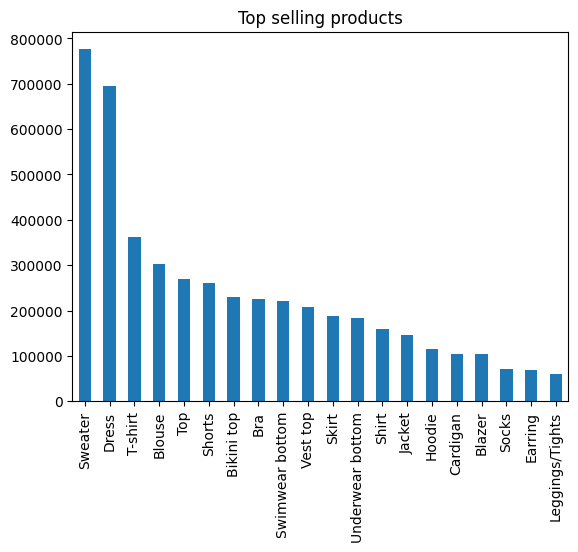

In [40]:
topselling(20)

In [41]:
def age_select(age):
    if (age>=20 and age<30): return 'age20_30'
    elif (age>=30 and age<40): return 'age30_40'
    else : return 'other'

In [42]:
newdf['agecat']=newdf['age'].map(age_select)

In [43]:
subsetflag=newdf.agecat=='other'

In [44]:
dfage20_40=newdf[-subsetflag]

In [45]:
onlydf=dfage20_40[['product_type_name','agecat']]

In [46]:
only=onlydf.groupby('agecat')['product_type_name'].value_counts().reset_index(name='Count')

In [47]:
q=only.product_type_name.head(10)

In [48]:
def age_top_selling(top):
    topprod=only.product_type_name.head(top)
    plt.tick_params(axis='both', which='major', labelsize=8)
    return sns.barplot(data=only[only.product_type_name.isin(topprod)],x='Count',y='product_type_name', orient='h',hue='agecat')

<AxesSubplot:xlabel='Count', ylabel='product_type_name'>

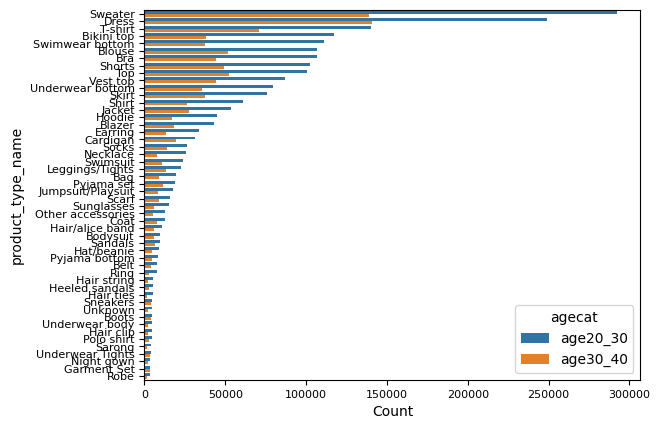

In [49]:
age_top_selling(50)

# Purchases over Time

In [200]:
def product_time(prod='Sweater'):
    mask=newdf.product_type_name==prod
    prod_time=newdf[mask]
    df1 = prod_time.groupby(prod_time['t_dat']).size().reset_index(name='Count')
    fig, ax = plt.subplots(figsize = (12,6))    
    ax.set_xticklabels(labels=df1.t_dat, rotation=45, ha='right')
    fig=sns.scatterplot(data=df1, x="t_dat", y="Count").set_title('Number of Purchases of Product over time span')
    x_dates = df1['t_dat'].dt.strftime('%Y-%m-%d').sort_values().unique()
    ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
    #return sns.scatterplot(data=df1, x="t_dat", y="Count").set_title('Number of Purchases of Product over time span')
    return fig

Text(0.5, 1.0, 'Number of Purchases of Product over time span')

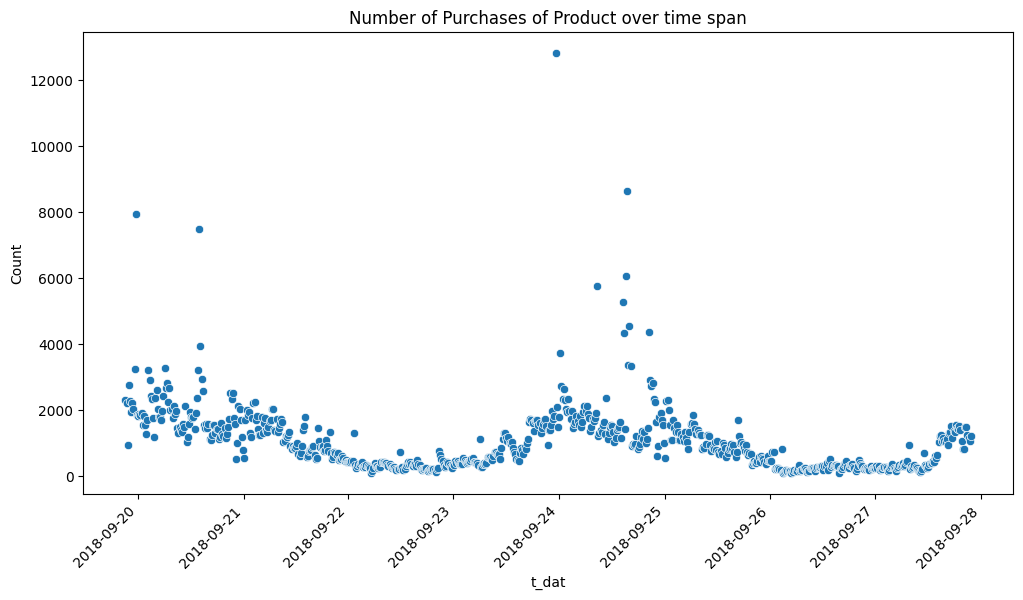

In [201]:
# T-shirt and Swimsuit Jacket Shorts
product_time('Sweater')

# Correlation

In [51]:
def prod_corr(topXprods=10):
    topprod=newdf.product_type_name.value_counts()
    list_topX=topprod.head(topXprods)
    t=newdf[newdf.product_type_name.isin(list_topX.index)]
    t_new=t[['t_dat','product_type_name']]
    y=t_new.groupby(['t_dat','product_type_name']).size().reset_index(name='Count')
    y_new=y.pivot_table(columns=['product_type_name'],index='t_dat', values='Count')
    #fig = px.imshow(y_new.corr(),title='Correlation Between Products')
    ax = plt.axes()
    ax.set_title('Correlation Between Products')
    return sns.heatmap(y_new.corr())

<AxesSubplot:title={'center':'Correlation Between Products'}, xlabel='product_type_name', ylabel='product_type_name'>

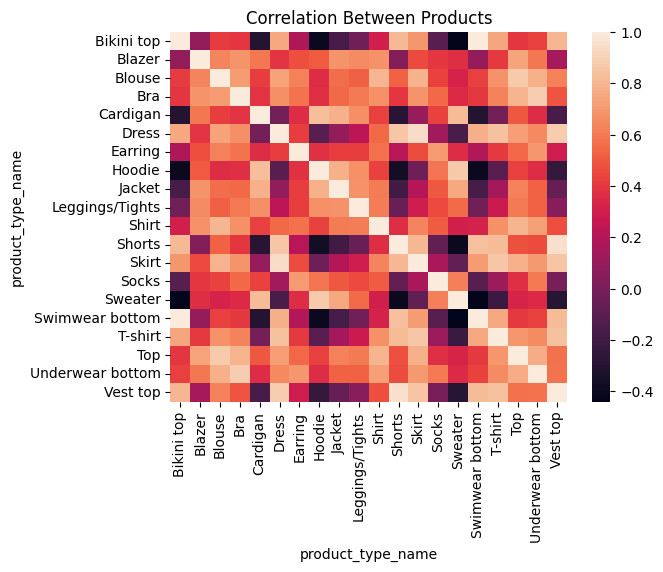

In [52]:
prod_corr(20)

# Complexity of Apriori Method

On page 215 and 216 in the textbook it is shown how we can calculate the memory requirement.
The number of rows in purchases_list is :

$$len(purchases\_list)=9.080.179 \hspace{0.5cm} baskets $$

We can calculate the number of unique items in our dataset:

$$ len(testnew.prod\_name.unique())=5.424.262 $$

Note testnew is my input to purchases_list so it must be same number items in purchases_list.

The number of pairs as:

$$\binom{5.424.262}{ 2}$$

This is approximately 

$$\frac{5.424.262^2}{2}=  1,47E+13 \hspace{0.5cm } store\hspace{0.1cm} space. $$

If integers take 4 bytes then it requires $2 \cdot items^2$ bytes.

This gives $2\cdot 5.424.262^2=5,88E+13$ bytes and equivalent to 58.845 Gigabytes. This figure should then be multiplied by number of baskets. 

The big O complexity of the Apriori method is $O(2^D)$ - which is exponential. 

# Aprori Analysis

Only use variables t_dat, customer_id, prod_name and age. For use in aprori analysis below.

In [109]:
#select_newdf=newdf[['t_dat','customer_id','prod_name','age']]
select_newdf=newdf[['t_dat','customer_id','product_type_name','age']]

In [110]:
select_newdf.head(3)

,t_dat,customer_id,product_type_name,age
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,Sweater,32.0
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,Sweater,32.0
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,Sweater,32.0


In [112]:
test = select_newdf.groupby(['customer_id', 't_dat','age'])['product_type_name'].apply(lambda x: ','.join(x.astype(str))).reset_index() 

In [113]:
testnew=pd.DataFrame(test)

In [114]:
testnew.head()

,customer_id,t_dat,age,product_type_name
0,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,2019-03-07,52.0,"Bikini top,Swimwear bottom"
1,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,2020-06-03,52.0,Underwear body
2,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,2020-08-12,52.0,T-shirt
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,2018-09-20,32.0,"Sweater,Sweater,Sweater,Sweater,Sweater"
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,2018-09-23,32.0,"Underwear bottom,Underwear bottom"


In [115]:
len(testnew)

2543001

In [116]:
age20_30=testnew[(testnew.age>=20) & (testnew.age<30)]

In [117]:
age30_40=testnew[(testnew.age>=30) & (testnew.age<40)]

In [153]:
age40_50=testnew[(testnew.age>=40) & (testnew.age<50)]

In [172]:
age40_above=testnew[(testnew.age>=40)]

In [174]:
age40_above.shape

(1039207, 4)

In [118]:
age20_30.head()

,customer_id,t_dat,age,product_type_name
48,0000e9a4db2da4e9c68558ad1e7df570d02767b213ec6b...,2019-01-16,27.0,T-shirt
49,0000e9a4db2da4e9c68558ad1e7df570d02767b213ec6b...,2020-08-24,27.0,"Unknown,Unknown"
81,0001b0127d3e5ff8dadcfc6e5043682dba2070f2667081...,2019-08-14,20.0,"Bra,Bra,Underwear bottom,Underwear bottom"
82,0001b0127d3e5ff8dadcfc6e5043682dba2070f2667081...,2019-11-07,20.0,"Top,Top"
83,0001b0127d3e5ff8dadcfc6e5043682dba2070f2667081...,2020-06-24,20.0,"Swimsuit,Blouse"


Number of customers betweeen age 20-30:

In [119]:
len(age20_30)

1002741

In [120]:
#Function to sample frac% of customers

def sample_cust(data, frac):
    b=data.customer_id.sample(frac=frac)
    return data.loc[b.index]

In [121]:
o20_30=sample_cust(age20_30,0.03)

In [122]:
o30_40=sample_cust(age30_40,0.03)

In [154]:
o40_50=sample_cust(age40_50,0.03)

In [175]:
o_above40=sample_cust(age40_above,0.03)

In [176]:
len(o_above40)

31176

This is the number of unique customers: 

In [178]:
print(len(o20_30))
print(len(o30_40))
print(len(o40_50))
print(len(o_above40))

30082
12842
11698
31176


This is the number of unique items in the frac% customer sample:

In [180]:
print(len(o30_40.product_type_name.unique()))
print(len(o20_30.product_type_name.unique()))
print(len(o_above40.product_type_name.unique()))

4308
7176
6718


In [181]:
# Only the basket
prods20_30=o20_30['product_type_name']
prods30_40=o30_40['product_type_name']
prods40_50=o40_50['product_type_name']
prods_above40=o_above40['product_type_name']


In [182]:
art20_30=prods20_30.values.tolist()
art30_40=prods30_40.values.tolist()
art40_50=prods40_50.values.tolist()
art40above=prods_above40.values.tolist()

In [183]:
print(art20_30[0])
print(art30_40[0])
print(art40_50[0])
print(art40above[0])

Shorts,Shorts,Shorts
Blouse
Shorts,Sandals,Shorts,Vest top
Dress


The same function as Hannah

In [184]:
purchaseslist20_30 = [] 
purchaseslist30_40 = [] 
purchaseslist40_50 = []
purchaseslist40above = []

for i in art20_30:
    #print(i)
    purchaseslist20_30.append(i.split(",")) 



for i in art30_40:
    #print(i)
    purchaseslist30_40.append(i.split(",")) 

for i in art40_50:
    #print(i)
    purchaseslist40_50.append(i.split(",")) 

for i in art40above:
    #print(i)
    purchaseslist40above.append(i.split(",")) 

In [163]:
#count=[]
#for j in range(len(purchases_list)):
#    count.append(len(purchases_list[j]))

In [132]:
#Export the purchases_list to csv file

fields = ['BasketNew']
with open('o', 'w') as f:
      
    # using csv.writer method from CSV package
    write = csv.writer(f)
      
    write.writerow(fields)
    write.writerows(purchaseslist30_40)

In [185]:
#Sparse=True go in fit 
te = TransactionEncoder()
te_ary = te.fit(purchaseslist20_30).transform(purchaseslist20_30)
df20_30 = pd.DataFrame(te_ary,columns=te.columns_)


te_ary = te.fit(purchaseslist30_40).transform(purchaseslist30_40)
df30_40 = pd.DataFrame(te_ary,columns=te.columns_)

te_ary = te.fit(purchaseslist40_50).transform(purchaseslist40_50)
df40_50 = pd.DataFrame(te_ary,columns=te.columns_)


te_ary = te.fit(purchaseslist40above).transform(purchaseslist40above)
df40above = pd.DataFrame(te_ary,columns=te.columns_)


In [134]:
df20_30.head()


,Bag,Ballerinas,Beanie,Belt,Bikini top,Blazer,Blouse,Bodysuit,Bootie,Boots,...,Underwear Tights,Underwear body,Underwear bottom,Underwear set,Unknown,Vest top,Wallet,Watch,Waterbottle,Wedge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


The above dimsions have really confused me !!!! The rows does not fit....But look below.

In [135]:
df20_30.shape

(30082, 86)

In [136]:
def aprio(df,minsup=0.001):
    apo=apriori(df, min_support=minsup, use_colnames=True)
    apo['length'] = apo['itemsets'].apply(lambda x: len(x))
    apo=apo.sort_values(by=['support'],ascending=False)
    return apo

## Age group 20-30

In [137]:
# Age 20-30
# 0.0001 too much
apo=aprio(df20_30,0.001)

In [138]:
apo

,support,itemsets,length
52,0.202181,(Sweater),1
13,0.163653,(Dress),1
56,0.099029,(T-shirt),1
5,0.086730,(Blouse),1
8,0.082042,(Bra),1
...,...,...,...
61,0.001031,(Underwear set),1
123,0.001031,"(Shorts, Bodysuit)",2
226,0.001031,"(Scarf, Top)",2
314,0.001031,"(Vest top, Underwear bottom, Bra)",3


In [140]:
#age 20-30

apo[apo.length>=2]

,support,itemsets,length
87,0.059172,"(Bikini top, Swimwear bottom)",2
143,0.025397,"(Underwear bottom, Bra)",2
173,0.017452,"(Sweater, Dress)",2
259,0.015790,"(Sweater, Top)",2
105,0.014959,"(Blouse, Dress)",2
...,...,...,...
132,0.001031,"(Necklace, Bra)",2
123,0.001031,"(Shorts, Bodysuit)",2
226,0.001031,"(Scarf, Top)",2
314,0.001031,"(Vest top, Underwear bottom, Bra)",3


In [141]:
def freqitm(df,minsup):
    frequent_itemsets = fpgrowth(df, min_support=minsup,use_colnames=True)
    frequent_itemsets= frequent_itemsets.sort_values(by=['support'],ascending=False)
    return frequent_itemsets

In [142]:
# age 20-30
# the same as above but faster 
freq20_30=freqitm(df20_30,0.0001)

In [143]:
freq20_30

,support,itemsets
4,0.202181,(Sweater)
21,0.163653,(Dress)
8,0.099029,(T-shirt)
17,0.086730,(Blouse)
5,0.082042,(Bra)
...,...,...
1004,0.000133,"(Vest top, Sweater, Top, Underwear bottom)"
1003,0.000133,"(Vest top, Top, Underwear bottom, Dress)"
993,0.000133,"(Underwear bottom, Bikini top, T-shirt, Swimwe..."
991,0.000133,"(Underwear bottom, Swimwear bottom, Dress, Bra..."


In [144]:
def apo_rules(frequent_itemsets):
    apriori_rules=association_rules(frequent_itemsets, metric="confidence", min_threshold=0.001)
    #apriori_rules=apriori_rules.sort_values('confidence', ascending = False, inplace = True)
    return apriori_rules

In [145]:
apo_rules(freq20_30).sort_values('confidence', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
20604,"(Earring, Swimwear bottom, Skirt)",(Bikini top),0.000133,0.077821,0.000133,1.000000,12.850064,0.000123,inf
9622,"(Shirt, Bikini top, Swimsuit)",(Swimwear bottom),0.000199,0.071305,0.000199,1.000000,14.024242,0.000185,inf
11579,"(Blouse, Shorts, Bodysuit)",(Vest top),0.000166,0.063593,0.000166,1.000000,15.725039,0.000156,inf
1217,"(Earring, Swimwear bottom)",(Bikini top),0.000831,0.077821,0.000831,1.000000,12.850064,0.000766,inf
15626,"(Blouse, Top, Swimwear bottom, Dress)",(Bikini top),0.000133,0.077821,0.000133,1.000000,12.850064,0.000123,inf
...,...,...,...,...,...,...,...,...,...
11894,(Dress),"(Sweater, Hat/beanie)",0.163653,0.001695,0.000166,0.001016,0.599069,-0.000111,0.999320
11877,(Dress),"(Vest top, Heeled sandals)",0.163653,0.000399,0.000166,0.001016,2.546042,0.000101,1.000617
11854,(Dress),"(Heeled sandals, Sweater)",0.163653,0.000366,0.000166,0.001016,2.777501,0.000106,1.000651
11849,(Dress),"(Bag, Top, Vest top)",0.163653,0.000299,0.000166,0.001016,3.394723,0.000117,1.000717


## Age group 30-40

In [147]:
apo=aprio(df30_40,0.001)

In [148]:
apo

,support,itemsets,length
13,0.208768,(Dress),1
54,0.206510,(Sweater),1
58,0.113923,(T-shirt),1
59,0.093521,(Top),1
5,0.087525,(Blouse),1
...,...,...,...
352,0.001012,"(Shorts, Top, Bikini top)",3
457,0.001012,"(Shirt, Top, T-shirt)",3
247,0.001012,"(Skirt, Leggings/Tights)",2
160,0.001012,"(Underwear body, Bra)",2


In [149]:
apo[apo.length>=2]

,support,itemsets,length
95,0.041037,"(Bikini top, Swimwear bottom)",2
200,0.026398,"(Sweater, Dress)",2
161,0.024685,"(Underwear bottom, Bra)",2
320,0.020090,"(Sweater, Top)",2
116,0.019701,"(Blouse, Dress)",2
...,...,...,...
352,0.001012,"(Shorts, Top, Bikini top)",3
457,0.001012,"(Shirt, Top, T-shirt)",3
247,0.001012,"(Skirt, Leggings/Tights)",2
160,0.001012,"(Underwear body, Bra)",2


In [150]:
#age 30-40
freq30_40=freqitm(df30_40,0.0001)

In [151]:
freq30_40

,support,itemsets
17,0.208768,(Dress)
19,0.206510,(Sweater)
16,0.113923,(T-shirt)
18,0.093521,(Top)
0,0.087525,(Blouse)
...,...,...
2459,0.000156,"(Bikini top, Wedge, Bra)"
2460,0.000156,"(Top, Wedge, Bra)"
2461,0.000156,"(Sandals, Wedge, Bra)"
2462,0.000156,"(Sandals, Bikini top, Wedge, Bra)"


In [152]:
apo_rules(freq30_40).sort_values('confidence', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28908,"(Earring, Bikini top, Blazer)",(Swimwear bottom),0.000156,0.054197,0.000156,1.000000,18.451149,0.000147,inf
22962,"(Bag, Sweater, T-shirt, Swimwear bottom)",(Bikini top),0.000156,0.051705,0.000156,1.000000,19.340361,0.000148,inf
22923,"(Bag, Blouse, Swimwear bottom)",(Bikini top),0.000156,0.051705,0.000156,1.000000,19.340361,0.000148,inf
22936,"(Bag, Sweater, Bikini top)",(T-shirt),0.000156,0.113923,0.000156,1.000000,8.777854,0.000138,inf
22949,"(Bag, Sweater, Bikini top)",(Swimwear bottom),0.000156,0.054197,0.000156,1.000000,18.451149,0.000147,inf
...,...,...,...,...,...,...,...,...,...
14123,(Dress),"(Bikini top, T-shirt, Swimsuit)",0.208768,0.000467,0.000234,0.001119,2.395002,0.000136,1.000652
14684,(Dress),"(Earring, Shorts, Bikini top, Swimwear bottom)",0.208768,0.000389,0.000234,0.001119,2.874002,0.000152,1.000730
12681,(Dress),"(Top, Leggings/Tights, Jacket)",0.208768,0.000311,0.000234,0.001119,3.592503,0.000169,1.000808
11045,(Dress),"(Garment Set, Dungarees)",0.208768,0.000389,0.000234,0.001119,2.874002,0.000152,1.000730


## Age group 40-50

In [165]:
apo=aprio(df40_50,0.001)

In [166]:
apo

,support,itemsets,length
55,0.209352,(Sweater),1
13,0.194392,(Dress),1
59,0.111814,(T-shirt),1
5,0.093435,(Blouse),1
60,0.086681,(Top),1
...,...,...,...
266,0.001026,"(Blouse, Bikini top, Swimwear bottom)",3
102,0.001026,"(Jumpsuit/Playsuit, Blouse)",2
295,0.001026,"(Skirt, Blouse, T-shirt)",3
268,0.001026,"(Underwear bottom, Bikini top, Bra)",3


In [167]:
apo[apo.length>=2]

,support,itemsets,length
83,0.037271,"(Bikini top, Swimwear bottom)",2
164,0.019405,"(Sweater, Dress)",2
131,0.017866,"(Underwear bottom, Bra)",2
98,0.017610,"(Blouse, Dress)",2
249,0.016755,"(Sweater, T-shirt)",2
...,...,...,...
266,0.001026,"(Blouse, Bikini top, Swimwear bottom)",3
102,0.001026,"(Jumpsuit/Playsuit, Blouse)",2
295,0.001026,"(Skirt, Blouse, T-shirt)",3
268,0.001026,"(Underwear bottom, Bikini top, Bra)",3


In [169]:
freq40_50=freqitm(df40_50,0.0001)

In [170]:
freq40_50

,support,itemsets
3,0.209352,(Sweater)
9,0.194392,(Dress)
12,0.111814,(T-shirt)
6,0.093435,(Blouse)
7,0.086681,(Top)
...,...,...
1975,0.000171,"(Bodysuit, Hair/alice band)"
1127,0.000171,"(Vest top, Blouse, Top, Swimwear bottom, Sweater)"
1128,0.000171,"(Vest top, Blouse, T-shirt, Swimwear bottom, D..."
1971,0.000171,"(Underwear bottom, Bodysuit)"


In [171]:
apo_rules(freq40_50).sort_values('confidence', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19778,"(Skirt, Blouse, Bag)","(Top, Dress)",0.000171,0.014789,0.000171,1.000000,67.618497,0.000168,inf
19427,"(Blouse, Top, Swimwear bottom, Dress, Skirt, Bag)",(T-shirt),0.000171,0.111814,0.000171,1.000000,8.943425,0.000152,inf
12347,"(Vest top, Shorts, Socks)",(T-shirt),0.000171,0.111814,0.000171,1.000000,8.943425,0.000152,inf
12287,"(Flip flop, Sarong)",(Bikini top),0.000171,0.049410,0.000171,1.000000,20.238754,0.000163,inf
12280,"(Flip flop, Sarong)",(Swimwear bottom),0.000171,0.046931,0.000171,1.000000,21.307832,0.000163,inf
...,...,...,...,...,...,...,...,...,...
6312,(Sweater),"(Sandals, Bikini top)",0.209352,0.000513,0.000256,0.001225,2.388322,0.000149,1.000713
6296,(Sweater),"(Belt, Bra)",0.209352,0.000342,0.000256,0.001225,3.582483,0.000185,1.000884
9067,(Sweater),"(Shorts, Bikini top, Swimwear bottom, Dress)",0.209352,0.000940,0.000256,0.001225,1.302721,0.000060,1.000285
6217,(Sweater),"(Swimwear bottom, Other accessories)",0.209352,0.000513,0.000256,0.001225,2.388322,0.000149,1.000713


## Age group above 40

In [187]:
apo=aprio(df40above,0.001)

In [188]:
apo

,support,itemsets,length
52,0.215198,(Sweater),1
13,0.196209,(Dress),1
5,0.106749,(Blouse),1
56,0.100719,(T-shirt),1
57,0.085418,(Top),1
...,...,...,...
265,0.001026,"(Shirt, Sweater, Dress)",3
200,0.001026,"(Shorts, Socks)",2
186,0.001026,"(Pyjama bottom, T-shirt)",2
160,0.001026,"(Hoodie, Leggings/Tights)",2


In [189]:
apo[apo.length>=2]

,support,itemsets,length
74,0.029574,"(Bikini top, Swimwear bottom)",2
148,0.015813,"(Sweater, Dress)",2
91,0.015493,"(Blouse, Dress)",2
217,0.014947,"(Sweater, T-shirt)",2
118,0.014145,"(Underwear bottom, Bra)",2
...,...,...,...
265,0.001026,"(Shirt, Sweater, Dress)",3
200,0.001026,"(Shorts, Socks)",2
186,0.001026,"(Pyjama bottom, T-shirt)",2
160,0.001026,"(Hoodie, Leggings/Tights)",2


In [190]:
freq40above=freqitm(df40above,0.0001)

In [191]:
freq40above

,support,itemsets
5,0.215198,(Sweater)
0,0.196209,(Dress)
21,0.106749,(Blouse)
9,0.100719,(T-shirt)
2,0.085418,(Top)
...,...,...
659,0.000128,"(Shorts, Cardigan, Socks)"
1669,0.000128,"(Sweater, Blazer, Coat)"
654,0.000128,"(Underwear bottom, Socks, Dress)"
651,0.000128,"(Top, Socks, Dress)"


In [194]:
apo_rules(freq40above).sort_values('confidence', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11433,"(Vest top, T-shirt, Shirt, Skirt)",(Dress),0.000128,0.196209,0.000128,1.000000,5.096616,0.000103,inf
6057,"(Sweater, Shorts, Swimwear bottom)",(Bikini top),0.000192,0.039678,0.000192,1.000000,25.202910,0.000185,inf
10884,"(Vest top, Blazer, Swimwear bottom)",(Bikini top),0.000128,0.039678,0.000128,1.000000,25.202910,0.000123,inf
10882,"(Vest top, Bikini top, Blazer)",(Swimwear bottom),0.000128,0.038267,0.000128,1.000000,26.132439,0.000123,inf
3802,"(Vest top, Swimwear bottom, Bra)",(Bikini top),0.000257,0.039678,0.000257,1.000000,25.202910,0.000246,inf
...,...,...,...,...,...,...,...,...,...
4788,(Sweater),(Slippers),0.215198,0.001764,0.000225,0.001043,0.591423,-0.000155,0.999278
5285,(Sweater),"(T-shirt, Swimwear bottom)",0.215198,0.002438,0.000225,0.001043,0.428003,-0.000300,0.998604
4824,(Sweater),"(Shirt, Leggings/Tights)",0.215198,0.000481,0.000225,0.001043,2.168550,0.000121,1.000563
4837,(Sweater),"(Vest top, Blouse, Dress)",0.215198,0.001283,0.000225,0.001043,0.813206,-0.000052,0.999760
